In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('train_data.csv')

In [22]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [23]:
for c in df.columns:
    print(c, df[c].unique(), len(df[c].unique()))

ID ['NNVBBKZB' 'IDD62UNG' 'HD3DSEMC' ... 'GEHAUCWT' 'GE7V8SAH' 'BOCZSWLJ'] 245725
Gender ['Female' 'Male'] 2
Age [73 30 56 34 62 48 40 55 53 27 31 79 33 46 59 65 37 44 32 50 70 25 52 26
 67 29 41 49 63 61 64 60 76 57 36 28 58 43 35 71 82 45 42 54 47 78 51 68
 83 39 84 24 38 74 81 69 75 85 66 80 72 77 23] 63
Region_Code ['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271'] 35
Occupation ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur'] 4
Channel_Code ['X3' 'X1' 'X2' 'X4'] 4
Vintage [ 43  32  26  19  33  20  13  38  49 123  14  31  57  69  97  15  63  21
  99  56  87  62  55 103 104  93  61  91  27  39  50  45  25 117  80  81
  73  67 109  92 122  75  79 121 111 116  85 115  86  37  74 110  44   9
  68  51  98 105 127 129 133   8   7 128 135 134] 66
Credit_Pr

In [26]:
print(df['Credit_Product'].isna().sum())
df['Credit_Product'].describe()

29325


count     216400
unique         2
top           No
freq      144357
Name: Credit_Product, dtype: object

In [27]:
print(df.columns)

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')


In [28]:
df_clean = df.dropna()

In [29]:
df_clean.to_csv('train_data_clean.csv', index=False)

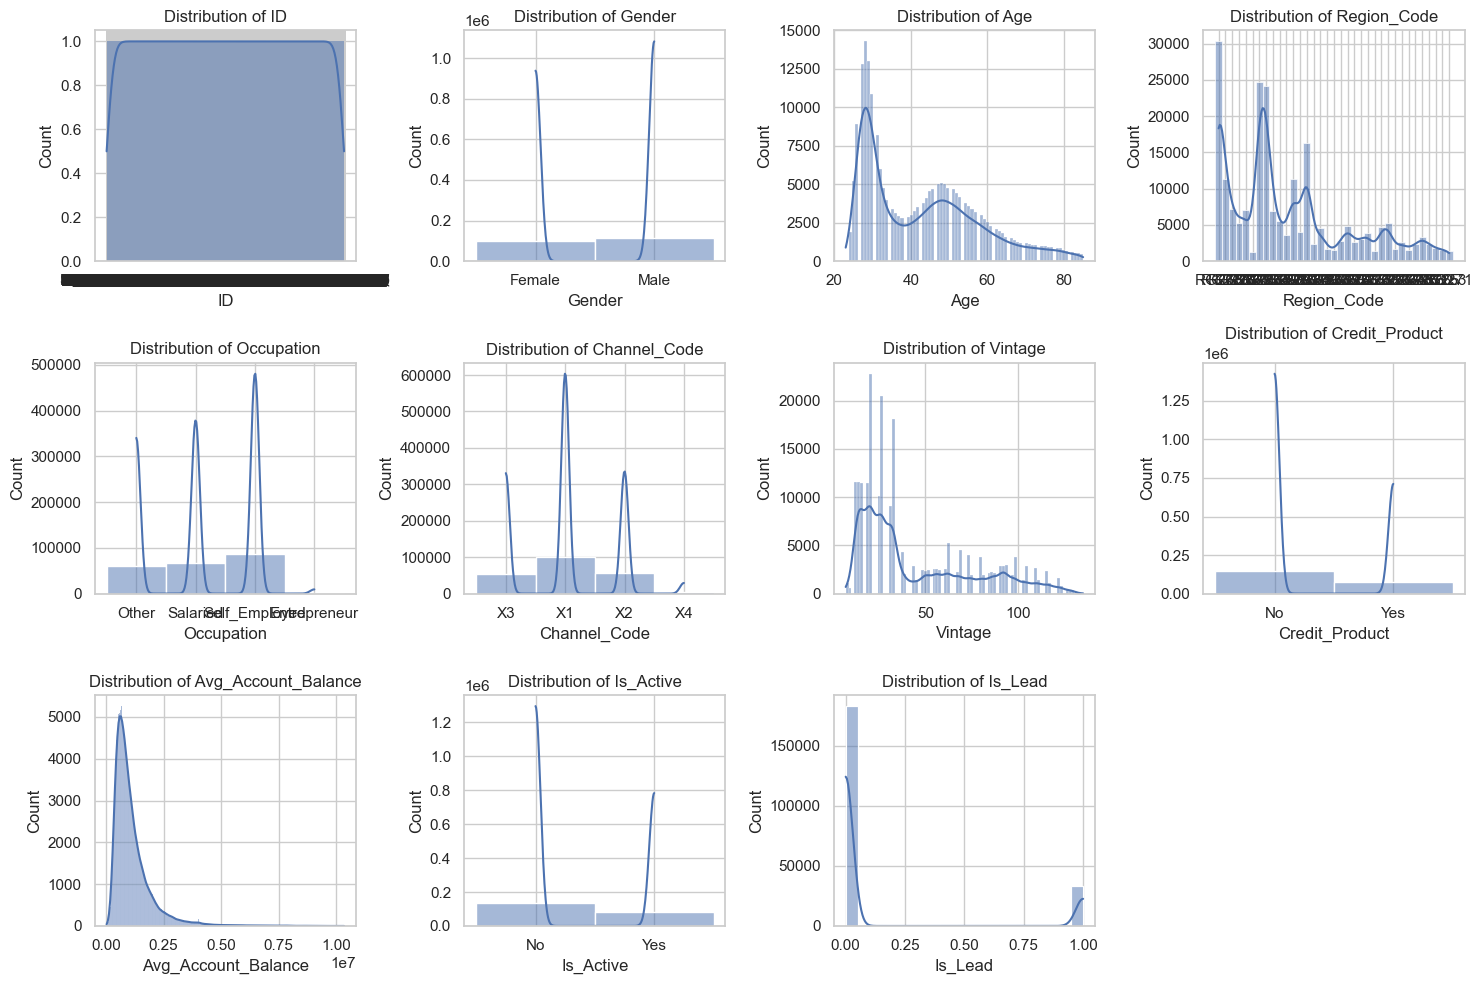

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))

for i, col in enumerate(df_clean.columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [30]:
col_names = ['Gender', 'Channel_Code', 'Region_Code', 'Occupation', 'Credit_Product', 'Is_Active']
map_dict = {}
for c in col_names:
    map_dict[c] = dict(zip(df_clean[c].unique(), range(len(df_clean[c].unique()))))

print(map_dict)

{'Gender': {'Female': 0, 'Male': 1}, 'Channel_Code': {'X3': 0, 'X1': 1, 'X2': 2, 'X4': 3}, 'Region_Code': {'RG268': 0, 'RG277': 1, 'RG270': 2, 'RG282': 3, 'RG261': 4, 'RG265': 5, 'RG283': 6, 'RG254': 7, 'RG269': 8, 'RG257': 9, 'RG279': 10, 'RG280': 11, 'RG252': 12, 'RG284': 13, 'RG259': 14, 'RG281': 15, 'RG258': 16, 'RG266': 17, 'RG260': 18, 'RG274': 19, 'RG256': 20, 'RG275': 21, 'RG273': 22, 'RG267': 23, 'RG272': 24, 'RG251': 25, 'RG262': 26, 'RG264': 27, 'RG278': 28, 'RG276': 29, 'RG263': 30, 'RG250': 31, 'RG255': 32, 'RG253': 33, 'RG271': 34}, 'Occupation': {'Other': 0, 'Salaried': 1, 'Self_Employed': 2, 'Entrepreneur': 3}, 'Credit_Product': {'No': 0, 'Yes': 1}, 'Is_Active': {'No': 0, 'Yes': 1}}


In [18]:
for c in col_names:
    df_clean[c] = df_clean[c].map(map_dict[c])

df_clean.head()

/var/folders/g2/fzb555xx2jd_tzp83pr2lw6w0000gn/T/ipykernel_74640/729122750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[c] = df_clean[c].map(map_dict[c])
/var/folders/g2/fzb555xx2jd_tzp83pr2lw6w0000gn/T/ipykernel_74640/729122750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[c] = df_clean[c].map(map_dict[c])
/var/folders/g2/fzb555xx2jd_tzp83pr2lw6w0000gn/T/ipykernel_74640/729122750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,73,0,0,0,43,0,1045696,0,0
1,IDD62UNG,0,30,1,1,1,32,0,581988,0,0
2,HD3DSEMC,0,56,0,2,0,26,0,1484315,1,0
3,BF3NC7KV,1,34,2,1,1,19,0,470454,0,0
4,TEASRWXV,0,30,3,1,1,33,0,886787,0,0


In [19]:
df_clean.to_csv('transformed_data.csv', index=False)